# Uebung 2




## Aufgabe 1 

Mit dem swisstopo WMS Server: Erstellen Sie ein neues GeoTIFF im Umkreis von 1000 Metern um das Bundeshaus in Bern (Bild 10000x10000).


Der Standort des Bundeshauses ist:

     pos_lv95 = (2_600_426, 1_199_497)
    
     in WGS84: pos_wgs84 = (7.444120726365559, 46.94653998135123)


In [11]:
from owslib.wms import WebMapService

In [12]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

wms = WebMapService("https://wms.geo.admin.ch")

layer = "ch.swisstopo.swissimage"

In [13]:
def getImageFromCenter(wms, layer, centerx, centery, meters, res_cm, output_file):
    ulx = centerx - meters / 2
    lrx = centerx + meters / 2
    uly = centery + meters / 2
    lry = centery - meters / 2

    w = int((lrx - ulx) * res_cm)
    h = int((uly - lry) * res_cm)

    print(w, h)

    img = wms.getmap(
        layers=[layer],
        styles=["default"],
        srs="EPSG:2056",
        bbox=(ulx, lry, lrx, uly),
        size=(w, h),
        format="image/tiff",
        transparent=False,
    )

    out = open(output_file, "wb")
    out.write(img.read())
    out.close()

In [14]:
getImageFromCenter(
    wms, layer, 2_600_426, 1_199_497, 1000, 10, "geodata/Bern_Center.tif"
)

10000 10000


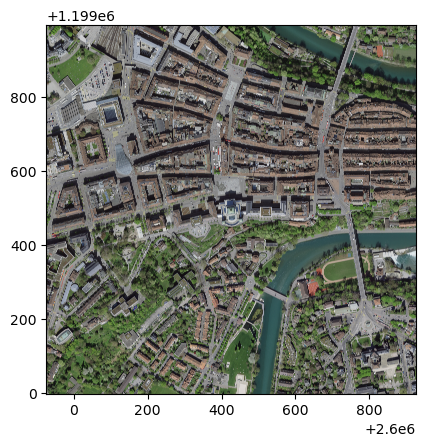

In [15]:
import rasterio.plot

with rasterio.open("geodata/Bern_Center.tif") as dataset:
    rasterio.plot.show(dataset)

## Aufgabe 2

Laden Sie 8 weitere Kacheln rund um die Bundeshaus-Kachel aus Aufgabe 1 herunter. Jede Kachel ist 10.000 x 10.000 Pixel gross und deckt 1.000 Meter in x- und y-Richtung ab. Die Kachel aus Aufgabe 1 ist mit einem X markiert.



        |-----|-----|-----|
        |     |     |     |
        |-----|-----|-----|
        |     |  X  |     |
        |-----|-----|-----|
        |     |     |     |
        |-----|-----|-----|

Nachdem Sie die Kacheln heruntergeladen und als GeoTiff gespeichert haben, erstellen Sie mit gdalbuildvrt eine einzelne Datei aus den Kacheln und nennen Sie sie „bern.vrt“.

<hr/>

Hinweis: Um Fehler zu vermeiden, müssen GeoTIFFs von swisstopo WMS konvertiert werden, da sie irgendwie fehlerhaft sind... das beste Ergebnis ist bisher die Konvertierung in JPG... (die Konvertierung von TIFF in TIFF löst das Problem nicht), z.B.

        !gdal_translate geodata/bern/tile.tif geodata/bern/tile.jpg -of JPEG
    
(Falls Sie verlustfrei bleiben möchten, können Sie in PNG und dann zurück in TIF konvertieren)

In [16]:
getImageFromCenter(
    wms, layer, 2_600_426 - 1000, 1_199_497 - 1000, 1000, 10, "geodata/Bern1.tif"
)
getImageFromCenter(
    wms, layer, 2_600_426 - 1000, 1_199_497, 1000, 10, "geodata/Bern2.tif"
)
getImageFromCenter(
    wms, layer, 2_600_426 - 1000, 1_199_497 + 1000, 1000, 10, "geodata/Bern3.tif"
)

getImageFromCenter(
    wms, layer, 2_600_426, 1_199_497 - 1000, 1000, 10, "geodata/Bern4.tif"
)

# getImageFromCenter(wms, layer, 2_600_426, 1_199_497, 1000, 10, "geodata/Bern_Center.tif")

getImageFromCenter(
    wms, layer, 2_600_426, 1_199_497 + 1000, 1000, 10, "geodata/Bern6.tif"
)

getImageFromCenter(
    wms, layer, 2_600_426 + 1000, 1_199_497 - 1000, 1000, 10, "geodata/Bern7.tif"
)
getImageFromCenter(
    wms, layer, 2_600_426 + 1000, 1_199_497, 1000, 10, "geodata/Bern8.tif"
)
getImageFromCenter(
    wms, layer, 2_600_426 + 1000, 1_199_497 + 1000, 1000, 10, "geodata/Bern9.tif"
)

10000 10000
10000 10000
10000 10000
10000 10000
10000 10000
10000 10000
10000 10000
10000 10000


In [17]:
!gdal_translate geodata/bern1.tif geodata/Bern1.jpg -of JPEG
!gdal_translate geodata/bern2.tif geodata/Bern2.jpg -of JPEG
!gdal_translate geodata/bern3.tif geodata/Bern3.jpg -of JPEG
!gdal_translate geodata/bern4.tif geodata/Bern4.jpg -of JPEG
!gdal_translate geodata/Bern_Center.tif geodata/Bern5.jpg -of JPEG
!gdal_translate geodata/bern6.tif geodata/Bern6.jpg -of JPEG
!gdal_translate geodata/bern7.tif geodata/Bern7.jpg -of JPEG
!gdal_translate geodata/bern8.tif geodata/Bern8.jpg -of JPEG
!gdal_translate geodata/bern9.tif geodata/Bern9.jpg -of JPEG

Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10000, 10000
0...10...20...30...40...50...60...70...80...90...100 - done.


In [18]:
!gdalbuildvrt geodata/bern.vrt geodata/Bern1.jpg geodata/Bern2.jpg geodata/Bern3.jpg geodata/Bern4.jpg geodata/Bern5.jpg geodata/Bern6.jpg geodata/Bern7.jpg geodata/Bern8.jpg geodata/Bern9.jpg 

0...10...20...30...40...50...60...70...80...90...100 - done.


In [19]:
!gdaladdo -r average geodata/bern.vrt 2 4 8 16 32

0...10...20...30...40...50...60...70...80...90...100 - done.


In [20]:
!gdal_translate -of GTiff -outsize 2048 0 geodata/bern.vrt geodata/bern-small.tif

Input file size is 30000, 30000
0...10...20...30...40...50...60...70...80...90...100 - done.


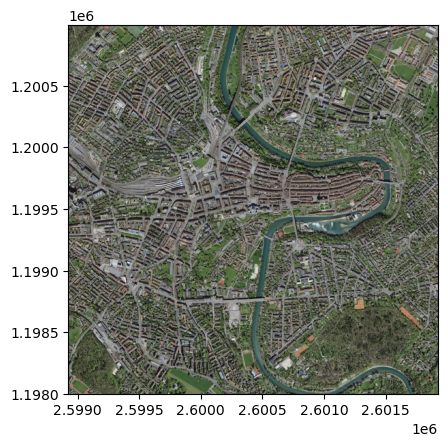

In [21]:
import rasterio.plot

dataset = rasterio.open("geodata/Bern-small.tif")
rasterio.plot.show(dataset)
dataset.close()

## Aufgabe 3

Erstellen Sie mit gdal2tiles Kacheln mithilfe der zuvor erstellten Datei bern.vrt.

Hinweise:
    * Quell-SRS ist LV95 (EPSG:2056). Geben Sie dies in gdal2tiles an
    * **maximale Zoomstufe 15** (empfohlen, um das System nicht zu überlasten...)

In [22]:
!gdal2tiles.py -s 'EPSG:2056' -p mercator -z 0-15 --processes=4 geodata/bern.vrt geodata/

In [23]:
!zip -r bern.zip bern -q

Der Befehl "zip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [24]:
!find . -type f | grep .png | wc -l

Der Befehl "grep" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
